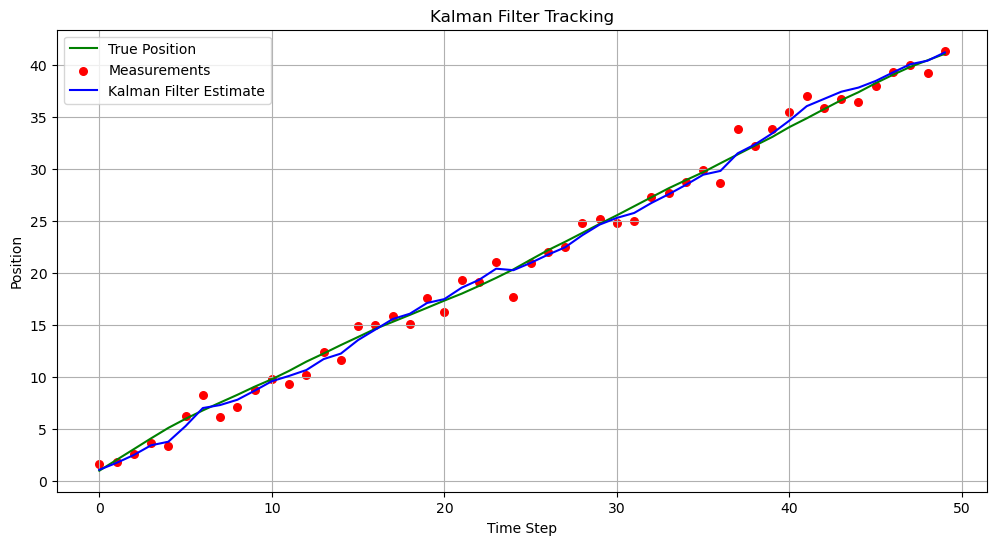

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Time parameters
dt = 1.0  # time step
n_steps = 50

# Define the state transition matrix (A) for constant velocity model
A = np.array([[1, dt],
              [0, 1]])

# Observation matrix (H)
H = np.array([[1, 0]])

# Process noise covariance (Q)
process_noise_std = 0.1
Q = np.array([[0.001, 0],
              [0, 0.003]])

# Measurement noise covariance (R)
measurement_noise_std = 1.0
R = np.array([[measurement_noise_std**2]])

# Initial true state [position, velocity]
x_true = np.array([0, 1])  # starting at position 0 with velocity 1

# Arrays to store true states and measurements
true_states = []
measurements = []

# Simulate true motion and measurements
for _ in range(n_steps):
    # Simulate process noise
    process_noise = np.random.randn(2) * np.sqrt(np.diag(Q))
    
    # True state update
    x_true = A @ x_true + process_noise
    true_states.append(x_true.copy())
    
    # Simulate measurement noise
    z = x_true[0] + np.random.randn() * measurement_noise_std
    measurements.append(z)

# Initialize state estimate
x_est = np.array([0, 0])  # initial guess: position=0, velocity=0

# Initialize covariance matrix
P = np.array([[1, 0],
              [0, 1]])

# Arrays to store estimates
estimates = []

for z in measurements:
    # Prediction step
    x_pred = A @ x_est
    P_pred = A @ P @ A.T + Q
    
    # Update step
    S = H @ P_pred @ H.T + R  # Residual covariance
    K = P_pred @ H.T @ np.linalg.inv(S)  # Kalman gain
    
    y = z - (H @ x_pred)  # Measurement residual
    x_est = x_pred + K.flatten() * y
    P = (np.eye(2) - K @ H) @ P_pred
    
    estimates.append(x_est.copy())

# Extract positions for plotting
true_positions = [state[0] for state in true_states]
est_positions = [est[0] for est in estimates]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(true_positions, label='True Position', color='g')
plt.scatter(range(n_steps), measurements, label='Measurements', color='r', marker='o', s=30)
plt.plot(est_positions, label='Kalman Filter Estimate', color='b')
plt.title('Kalman Filter Tracking')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.grid()
plt.show()
